### Neural Network Lab

Professor: Rick Chakra

TA: Geethika Balasubramanian

#Let's see why does a neural network need an activation function

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate polynomial data
np.random.seed(0)
X = np.random.rand(100, 2) * 2 - 1  # 2D array with Random points in the range [-1, 1]
y = ((X[:, 0] ** 2 + X[:, 1] ** 2) < 0.5).astype(np.float32)  # Circle boundary, 1 if <0.5, 0>0.5 (2 classes)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Adding a singleton dimension- shape necessary to train neural network



In [2]:
# Define a neural network without activation function
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # self.fc = nn.Linear(3, 2)  # Linear layer 1
        # self.fc = nn.Linear(2, 1) #Linear layer 1
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x
        # return self.fc(x)

# Define a neural network with activation function
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 8)  # Linear layer
        self.activation = nn.ReLU()       # Activation function (ReLU)-
        self.fc2 = nn.Linear(8, 1)  # Linear layer

    def forward(self, x):
        x = self.activation(self.fc1(x))  # Activation function (ReLU) after first layer
        x = self.fc2(x)
        return x

print("Linear Model")
model = LinearModel()
print(model)
print("Neural Network")
model = NeuralNetwork()
print(model)


Linear Model
LinearModel(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
Neural Network
NeuralNetwork(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (activation): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [3]:
# Train the model
def train(model, criterion, optimizer, X, y, epochs=1000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()


def plot_decision_boundary(X, y, model, title):
    X = X.numpy()
    y = y.numpy().squeeze()  # Squeeze the y tensor to remove extra dimension
    plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0') #data points of class=0
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1') #data points of class=1

    # Creating a meshgrid for all the possible values of features
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 #Padding of 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)) #Create 100*100 meshgrid points evenly spaced between x_max x_min for x-axis and y_max,y_min for y_axis
    X_grid = np.c_[xx.ravel(), yy.ravel()] #Flattens the dataset.

    print('X_grid')
    display(X_grid)


    # Predict the class for each meshgrid point
    Z = model(torch.tensor(X_grid, dtype=torch.float32)).detach().numpy().reshape(xx.shape)
    # Plot the decision boundary using contour lines
    plt.contour(xx, yy, Z,colors='green', linestyles='dashed', linewidths=2,MaxNLocator=0,levels=0) #Connects the point where the probabilities for (class 0 and class 1) are equal giving us contours

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

In [4]:
# Create models, criterion, and optimizer
linear_model = LinearModel()
neural_network = NeuralNetwork()
criterion = nn.BCEWithLogitsLoss()  #Loss function
optimizer_linear = optim.SGD(linear_model.parameters(), lr=0.1)
optimizer_neural = optim.SGD(neural_network.parameters(), lr=0.1)

# Train the models
train(linear_model, criterion, optimizer_linear, X_tensor, y_tensor)
train(neural_network, criterion, optimizer_neural, X_tensor, y_tensor)


X_grid


array([[-1.07657186, -1.09060905],
       [-1.05482116, -1.09060905],
       [-1.03307045, -1.09060905],
       ...,
       [ 1.03324629,  1.09769402],
       [ 1.05499699,  1.09769402],
       [ 1.07674769,  1.09769402]])

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_14062/859360218.py:30: UserWarning: The following kwargs were not used by contour: 'MaxNLocator'
  plt.contour(xx, yy, Z,colors='green', linestyles='dashed', linewidths=2,MaxNLocator=0,levels=0) #Connects the point where the probabilities for (class 0 and class 1) are equal giving us contours


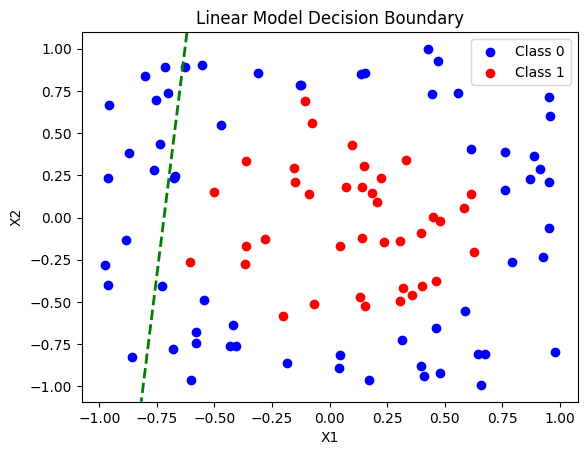

X_grid


array([[-1.07657186, -1.09060905],
       [-1.05482116, -1.09060905],
       [-1.03307045, -1.09060905],
       ...,
       [ 1.03324629,  1.09769402],
       [ 1.05499699,  1.09769402],
       [ 1.07674769,  1.09769402]])

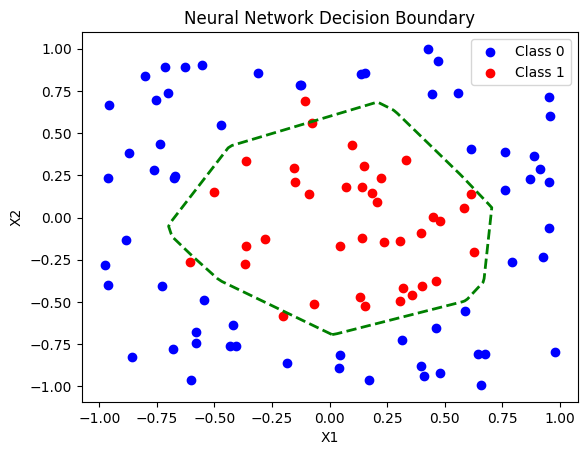

In [5]:

# Plot decision boundaries
plot_decision_boundary(X_tensor, y_tensor, linear_model, 'Linear Model Decision Boundary')
plot_decision_boundary(X_tensor, y_tensor, neural_network, 'Neural Network Decision Boundary')

This shows that neural network without an activation function (Non linearity) is just a linear model. Activation functions are essential for neural networks to introduce non-linearity.

#Let's Undestand different Activation functions.

In [ ]:
class ActivationFunction(nn.Module):

    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {"name": self.name}

In [ ]:
##############################

class Sigmoid(ActivationFunction):

    def forward(self, x):
        return 1 / (1 + torch.exp(-x))

##############################

class Tanh(ActivationFunction):

    def forward(self, x):
        x_exp, neg_x_exp = torch.exp(x), torch.exp(-x)
        return (x_exp - neg_x_exp) / (x_exp + neg_x_exp)

##############################

In [ ]:
##############################

class ReLU(ActivationFunction):

    def forward(self, x):
        return x * (x > 0).float()

##############################

class LeakyReLU(ActivationFunction):

    def __init__(self, alpha=0.1):
        super().__init__()
        self.config["alpha"] = alpha

    def forward(self, x):
        return torch.where(x > 0, x, self.config["alpha"] * x)



In [ ]:
act_fn_by_name = {
    "sigmoid": Sigmoid,
    "tanh": Tanh,
    "relu": ReLU,
    "leakyrelu": LeakyReLU
}

In [ ]:
def get_grads(act_fn, x):
    """
    Computes the gradients of an activation function at specified positions.

    Inputs:
        act_fn - An object of the class "ActivationFunction" with an implemented forward pass.
        x - 1D input tensor.
    Output:
        A tensor with the same size of x containing the gradients of act_fn at x.
    """
    x = x.clone().requires_grad_() # Mark the input as tensor for which we want to store gradients
    out = act_fn(x)
    out.sum().backward() # Summing results in an equal gradient flow to each element in x
    return x.grad # Accessing the gradients of x by "x.grad"

In [ ]:
def vis_act_fn(act_fn, ax, x):
    # Run activation function
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    # Push x, y and gradients back to cpu for plotting
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    ## Plotting
    ax.plot(x, y, linewidth=2, label="ActFn")
    ax.plot(x, y_grads, linewidth=2, label="Gradient")
    ax.set_title(act_fn.name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())

# Add activation functions if wanted
act_fns = [act_fn() for act_fn in act_fn_by_name.values()]
x = torch.linspace(-5, 5, 1000) # Range on which we want to visualize the activation functions
## Plotting
rows = math.ceil(len(act_fns)/2.0)
fig, ax = plt.subplots(rows, 2, figsize=(8, rows*4))
for i, act_fn in enumerate(act_fns):
    vis_act_fn(act_fn, ax[divmod(i,2)], x)
fig.subplots_adjust(hspace=0.3)
plt.show()

#Let's build a Neural Network

The first step is to import pytorch and make sure its the right version!

In [ ]:
# Import Pytorch
import torch
print(torch.__version__)

In [ ]:
#If it wont import because torch isn't installed
#!pip install torch

Lets now import the other packages we need

In [ ]:
# Import other packages
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from matplotlib import pyplot as plt

After importing the remaining packages needed to make a Nural Network we need to set up our dataset to be used by pytorch.

In [ ]:
# Difine Dataset
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        self.df = read_csv(path, header=0)
        # store the inputs and outputs
        self.X = self.df.values[:, :-1]
        self.y = self.df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(#FILL_IN)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((#FILL_IN))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.2,n_val=0.2):
        # determine sizes
        test_size = round(n_test * len(self.X))
        val_size = round(n_val * len(self.X))
        train_size = len(self.X) - test_size - val_size
        # calculate the split
        return random_split(self, [train_size, test_size, val_size])

    # get dataset
    def get_dataset(self):
      return self.df

Next we are going to make a function to use the previous function and split our dataset.

In [ ]:
# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test, val = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(#FILL_IN)
    val_dl = DataLoader(val, batch_size=47, shuffle=True)
    test_dl = DataLoader(#FILL_IN)

    # get df
    df = dataset.get_dataset()
    return df, train_dl, test_dl, val_dl

Now that we have all of our data functions defined we can call them to prepare our data

In [ ]:
#Import and prepare the data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
# path = 'ionosphere.csv'
df, train_dl, test_dl, val_dl = #FILL_IN
print(len(train_dl.dataset), len(test_dl.dataset), len(val_dl.dataset))

In [ ]:
# view dataset
print(df)

Now that our data is ready we need to make our model. Unlike the other model types we have used in this class, we need to actually make our model (This can involve a lot of tuning in real life). For this example lets make 3 hidden layers.

In [ ]:
# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = #FILL IN
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = #FILL IN
        # second hidden layer
        self.hidden2 = #FILL IN
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = #FILL IN
        # third hidden layer and output
        self.hidden3 = #FILL IN
        xavier_uniform_(self.hidden3.weight)
        self.act3 = #FILL IN

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        #FILL IN
        #FILL IN
         # second hidden layer
        #FILL IN
        #FILL IN
        # third hidden layer and output
        #FILL IN
        #FILL IN
        return X

Now we need to choose how our model will train and improve

In [ ]:
def train_model(train_dl, val_dl, model):
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

    train_losses = []
    val_losses = []

    for epoch in range(200):
        train_loss = 0.0
        val_loss = 0.0

        # Training phase
        model.train()  # Set model to training mode
        for i, (inputs, targets) in enumerate(train_dl):
            #FILL IN
            yhat = model(inputs)
            #FILL_IN
            #FILL_IN
            #FILL_IN
            train_loss += loss.item()

        # Validation phase
        model.eval()  # Set model to evaluation mode
        with #FILL_IN:  # Disable gradient calculation for validation
            for inputs, targets in val_dl:
                yhat = model(inputs)
                #FILL_IN
                val_loss += loss.item()

        # Average loss for the epoch
        train_loss /= len(train_dl)
        val_loss /= len(val_dl)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch + 1}/200], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Plotting the training and validation losses
    plt.plot(range(1, 201), train_losses, label='Train')
    plt.plot(range(1, 201), val_losses, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.show()

Now we set up a function to define how to evaluate the model (accuracy)

In [ ]:
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

To further show how our model is working lets have the completed model create a prediction on a row of data

In [ ]:
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = #FILL IN
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

Now its time to actually run the model and have it use our data!

In [ ]:
# define the network
model = #FILL IN
# train the model
train_model(#FILL IN)
# evaluate the model
acc = evaluate_model(#FILL IN)

In [ ]:
# print final model accuracy
print('Final Model Accuracy: %.3f' % acc)

In [ ]:
# make a single prediction (expect class=1)
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = predict(#FILL IN)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

One of the reasons that we use functions so much in this section is it allows for an easier time making different models and comparing how they preform!